<a href="https://colab.research.google.com/github/JSEFERINO/C_Datos/blob/main/14_C_Datos_Regresi%C3%B3n_LIneal_Multiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Curso Introductorio a la Ciencia de Datos por Julio Hurtado Márquez**
## **Parte IV**
# **67. Importar y exportar dataframes limpios**

# **a. Deseamos que siempre aparezca incorporado Drive a nuestro Colab y nuestros archivos no aparezcan temporalmente"**
- Hacemoc click en Archivos en la Carpeta con el símbolo de Drive

In [ ]:
# **a. Deseamos que siempre aparezca incorporado Drive a nuestro Colab y nuestros archivos no aparezcan temporalmente"
#
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **b. Librerías actualizada hasta el momento**


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
sns.set_style('darkgrid')
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


import scipy.stats as stats
from pandas.plotting import register_matplotlib_converters
import seaborn.objects as so
import statsmodels.api as sm

## **c. Exportamos nuestra última base de datos**

In [ ]:
## **c. Exportamos nuestra última bbase de datos**
df_datos2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/df_datos_LIMPIOS2.csv", delimiter=',')
df_datos2

,CURSO,DEFINITIVA,PROGRAMA,EDAD,URBANO,PESO,ESTATURA,SATISFACC,SABER 11,PROMEDIO,SEXO,ESTRATO,Herramientas,Aris2,nota2
0,ESTADISTICA I,4.3,COMS,18,SI,55,164,4,350,4.26,F,II,PTWF,0,3
1,ESTADISTICA I,3.1,COMS,19,SI,65,165,5,328,4.11,F,I,CYDT,1,2
2,ESTADISTICA I,4.2,DERH,25,NO,56,170,5,285,3.70,M,I,CYDT,2,3
3,ESTADISTICA I,3.6,DERH,23,SI,65,170,5,280,4.10,F,II,PCWF,3,4
4,ESTADISTICA I,3.9,PSIC,19,SI,50,169,5,319,4.00,F,II,CYWF,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,ESTADISTICA I,3.5,PSIC,18,SI,60,163,5,310,3.90,F,III,PTWF,116,5
117,ESTADISTICA I,3.5,PSIC,18,SI,60,180,3,346,3.90,M,IV,PCWF,117,1
118,ESTADISTICA I,2.5,COMS,21,NO,45,172,5,221,3.70,F,II,CYWF,118,1
119,ESTADISTICA I,3.0,COMS,20,NO,50,160,4,332,3.50,F,II,CYDT,119,1


# **67. Regresión Lineal - Parte I**

## **a. Definimos nuestro conjunto de variables a considerar en la regresión"**

In [ ]:
## **a. Definimos nuestro conjunto de variables a considerar"
nuevo = df_datos2[['CURSO', 'DEFINITIVA', 'PROGRAMA', 'EDAD', 'URBANO', 'PESO', 'ESTATURA',
       'SATISFACC', 'SABER 11', 'PROMEDIO', 'SEXO', 'ESTRATO', 'Herramientas',
        ]]

## **b. Para la visualización de nuestros Datos**

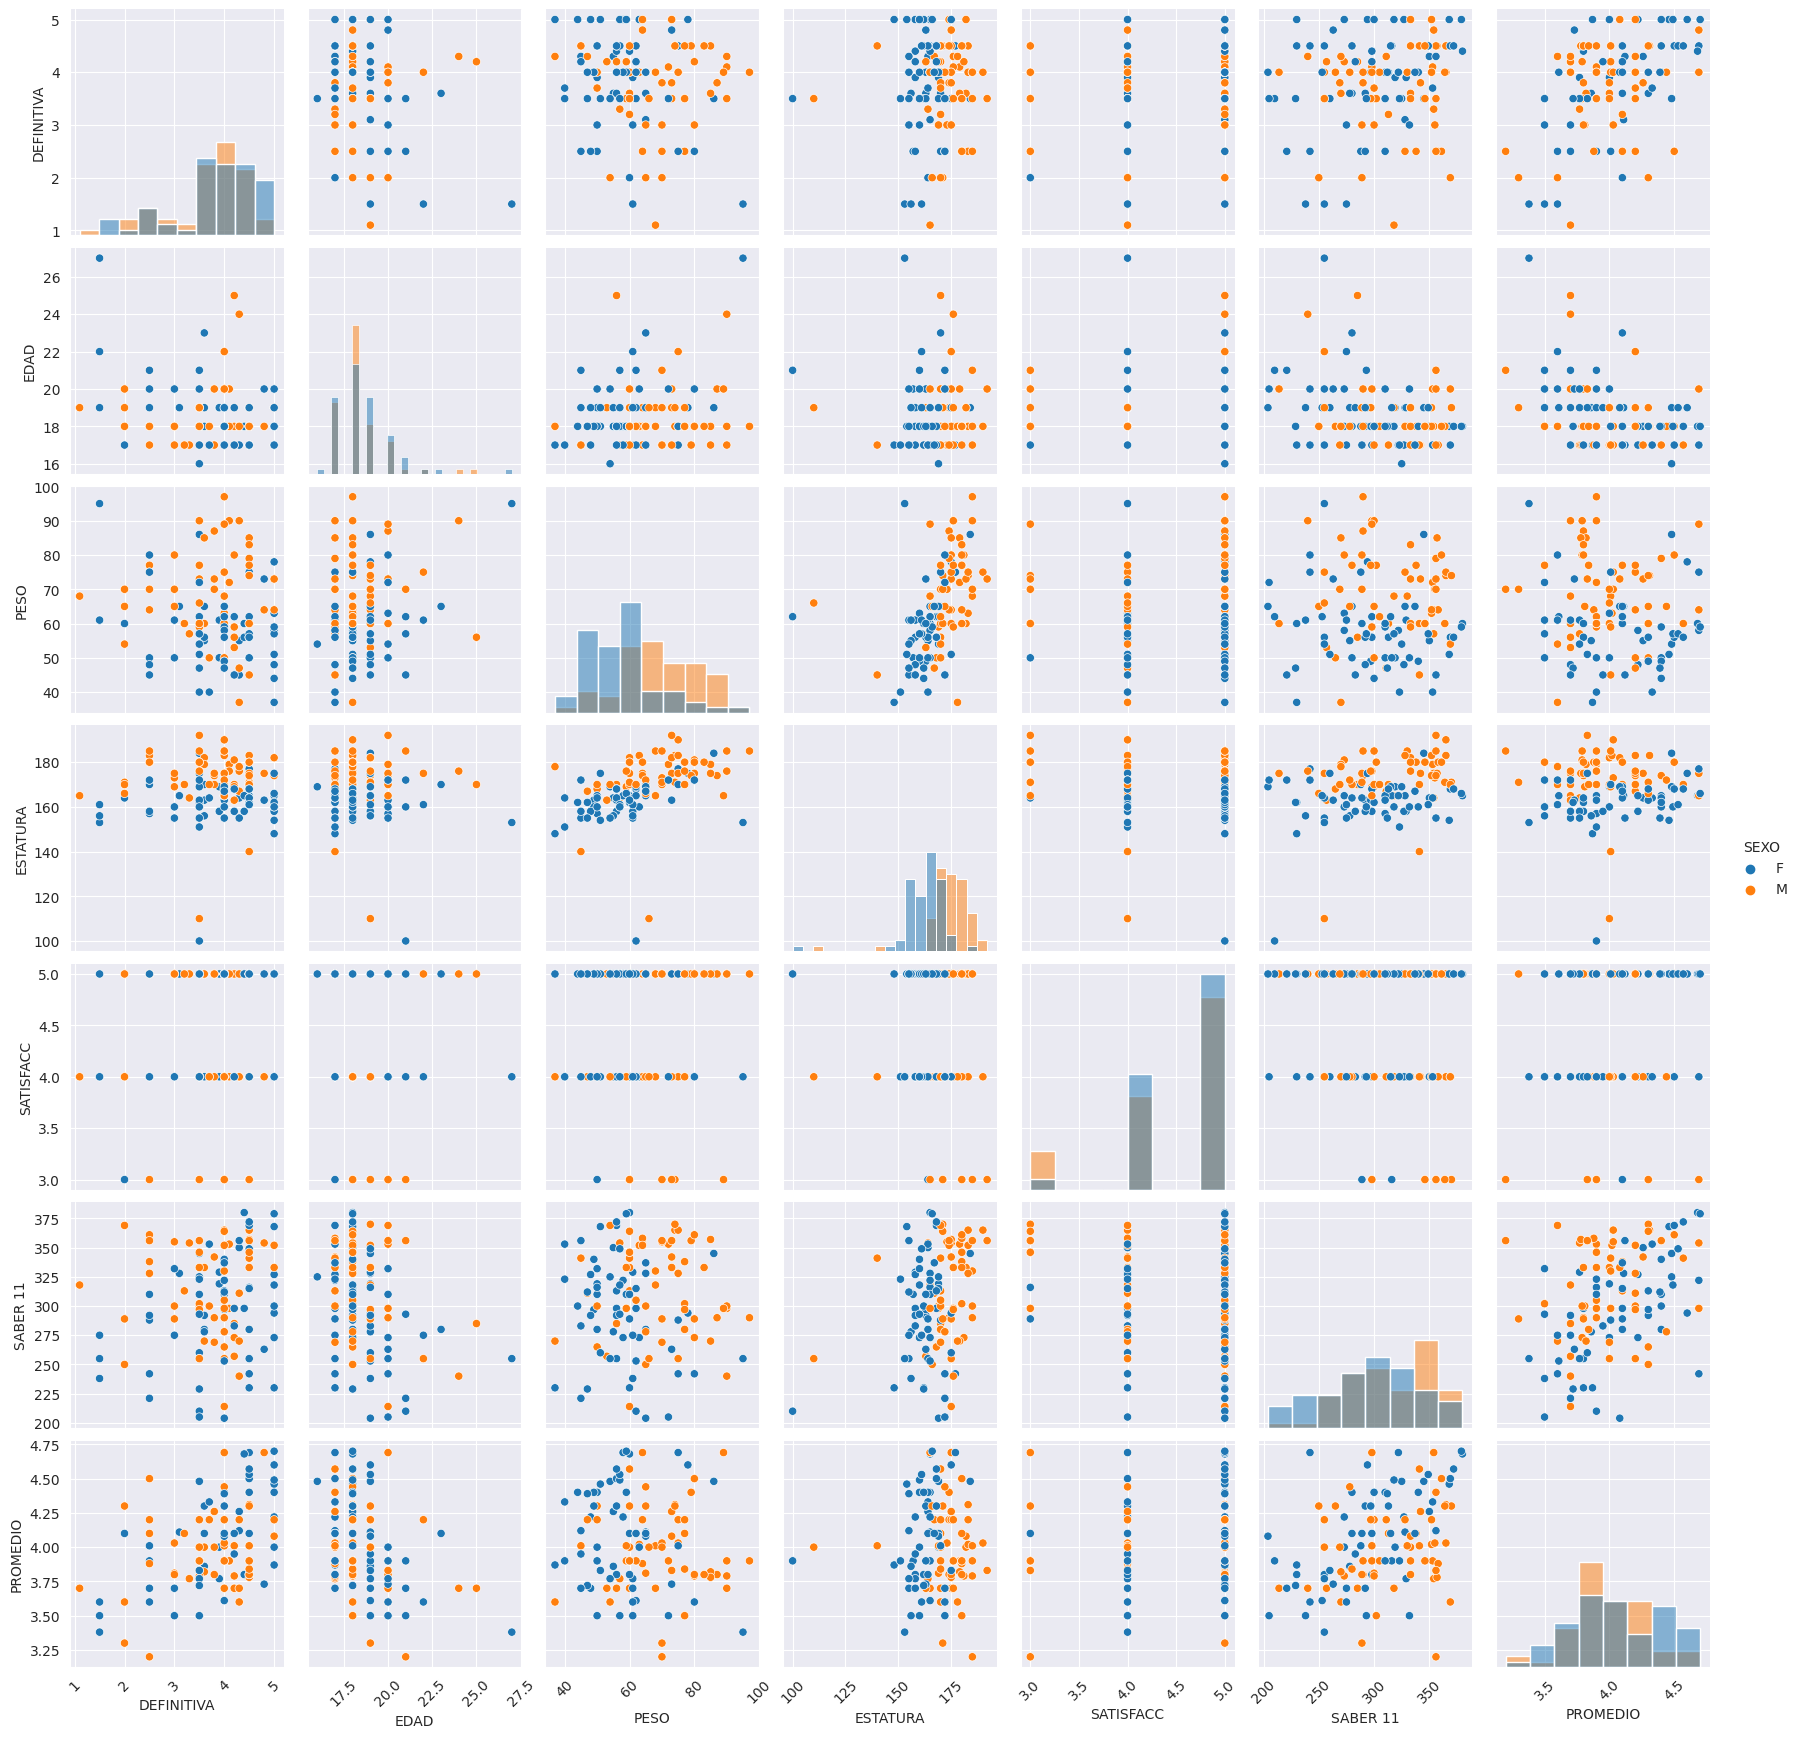

In [ ]:
## **b. Para la visualización**
g = sns.pairplot(nuevo, hue='SEXO', diag_kind = 'hist') # Definimos nuestro gráfico
for ax in g.axes.flat: # Un pequeño _for_ que recorra todas las variables
  plt.setp(ax.get_xticklabels(),rotation = 45) #Realizamos el grafico y estudiamos todas las relaciones entre las variables

# **68. Realizando un análisis sencillo con dos variables**

##  **a. En el caso de encontrar datos o caracteres extraños**

In [ ]:
#**a. En el caso de encontrar datos o caracteres extraños**
df_datos2= df_datos2.replace(np.nan, '0')

## **b. Redefinamos nuestras variables que vamos a usar en la regresión**

In [ ]:
## **b. Redefinamos nuestras variables que vamos a usar en la regresión**
DEFINITIVA = df_datos2['DEFINITIVA'].values
EDAD = df_datos2['EDAD'].values
PESO =df_datos2['PESO'].values
ESTATURA = df_datos2['ESTATURA'].values
SABER_11 = df_datos2['SABER 11'].values
PROMEDIO = df_datos2['PROMEDIO'].values
SATISFACC = df_datos2['SATISFACC'].values

## **c. Definimos las variables Dependientes y las Independientes**

In [ ]:
## **c. Definimos las variables Dependientes y las Independientes**
X = np.array([ESTATURA]).T # Elegimos una variable para la regresión (.T es para la transpuesta)
Y = np.array(PESO) # Variable dependiente

## **d. Definimos el Modelo de Regresión Lineal**

In [ ]:
## **d. Definimos el Modelo de Regresión Lineal**
reg = LinearRegression() # Parte del Modelo
reg = reg.fit(X,Y) # Ajustar el modelo
Y_pred = reg.predict(X) # Predicción del odelo
error = np.sqrt(mean_squared_error(Y,Y_pred)) , # Error cuadratico medio
R_2 = reg.score(X,Y)


## **e. Los resultados del Modelo**

In [ ]:
## **e. Los resultados del Modelo**
print('El error cuadratico medio es ', error)
print('El valor de R_cuadrado es ', R_2)
print('Los coeficientes de regresión son: \n', reg.intercept_,  reg.coef_) # '\n' es para el espacio vertical

El error cuadratico medio es  (11.597815302633778,)
El valor de R_cuadrado es  0.18946277374770004
Los coeficientes de regresión son: 
 -13.201783468617762 [0.45518779]


## **f. Realizar una predicción**

In [ ]:
## **f. Realizar una predicción**
DEFINITIVA_1 = 3.8
EDAD_1 = 21
PESO_1 =75
ESTATURA_1 = 165
SABER_11_1 = 250
PROMEDIO_1 = 4.3
print('La predicción para los valores dados es ', reg.predict([[165]]))

La predicción para los valores dados es  [61.90420113]


# **69. Realizando un análisis sencillo con tres variables - Forma 2**

## **a. Definimos las variables Dependientes y las Independientes**

In [ ]:
## **a. Definimos las variables Dependientes y las Independientes**
X2 = np.array([SABER_11, PROMEDIO, SATISFACC ]).T # Elegimos una variable para la regresión (.T es para la transpuesta)
Y2 = np.array(DEFINITIVA) # Variable dependiente

## **b. Definimos el Modelo de Regresión Lineal**

In [ ]:
## **b. Definimos el Modelo de Regresión Lineal**
reg = LinearRegression() # Parte del Modelo
reg = reg.fit(X2,Y2) # Ajustar el modelo
Y_pred = reg.predict(X2) # Predicción del odelo
error = np.sqrt(mean_squared_error(Y2,Y_pred)) , # Error cuadratico medio
R_2 = reg.score(X2,Y2)

## **c. Los resultados del Modelo**

In [ ]:
## **c. Los resultados del Modelo**
print('El error cuadratico medio es ', error)
print('El valor de R_cuadrado es ', R_2)
print('Los coeficientes de regresión son: \n', reg.intercept_,  reg.coef_) # '\n' es para el espacio vertical

El error cuadratico medio es  (0.7639625573797163,)
El valor de R_cuadrado es  0.2116103792832219
Los coeficientes de regresión son: 
 -1.092882916831377 [-7.04054589e-04  1.21421078e+00  4.14144779e-02]


## **d. Otras métricas del modelo**

In [ ]:
## **d. Otras métricas del modelo**
print('MAE:', mean_absolute_error(Y2,Y_pred))
print("MSE",mean_squared_error(Y2,Y_pred))
print("RMSE",np.sqrt(mean_squared_error(Y2,Y_pred)))
r2 = r2_score(Y2,Y_pred)
print('Model Score: ', r2)

MAE: 0.5857749254222687
MSE 0.5836387890781563
RMSE 0.7639625573797163
Model Score:  0.2116103792832219


## **e. La predicción para los valores dados es**

In [ ]:
## **e. La predicción para los valores dados es**
print('La predicción para los valores dados es ', reg.predict([[300, 4.5, 2]]))

La predicción para los valores dados es  [4.24267818]


In [ ]:
df_datos2.columns

Index(['CURSO', 'DEFINITIVA', 'PROGRAMA', 'EDAD', 'URBANO', 'PESO', 'ESTATURA',
       'SATISFACC', 'SABER 11', 'PROMEDIO', 'SEXO', 'ESTRATO', 'Herramientas',
       'Aris2', 'nota2'],
      dtype='object')